# Seaborn

- Seaborn은 파이썬에서 데이터 시각화를 더욱 아름답고 효과적으로 만들기 위해 고안된 강력한 라이브러리
- 내부적으로 matplotlib 를 호출하여 시각화하는 라이브러리
- Matplotlib을 기반으로 하면서도 다양한 통계 시각화 기능을 제공
    
- 설치
```bash
pip install seaborn
```


## Seaborn의 주요 특징
- 매력적인 기본 스타일
    - Seaborn은 기본적으로 깔끔하고 보기 좋은 스타일을 제공하여, 별도의 스타일 설정 없이도 고품질의 시각화를 얻을 수 있음
- 통계 시각화에 특화
    - 다양한 통계 그래프를 간편하게 생성할 수 있으며, 데이터의 분포, 관계, 트렌드 등을 시각적으로 탐색하는 데 매우 유용
- 쉬운 인터페이스
    - Matplotlib에 비해 더욱 간결하고 직관적인 인터페이스를 제공하여, 복잡한 시각화도 쉽게 구현
- Matplotlib과의 호환성
    - Matplotlib과 함께 사용하여 더욱 세밀한 조정이 가능

- colab 한글깨짐 방지

In [15]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

- 통신사 고객 이탈 여부 데이터셋
    - https://drive.google.com/file/d/12HdFsPAcBb8fMXen0VlRJyHyCye_2KNr/view?usp=sharing
    - 이탈 여부
        > 1 = 이탈, 0 = 정상
    - 성별 컬럼
        > 1 = 여성, 0 = 남성
    - 여부 관련 컬럼
        > 1 = yes, 0 = no
    - 약정기간 컬럼
        > 0 = 약정 없음, 1 = 1년 약정, 2 = 2년 약정

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DATA_PATH = "data/"
df = pd.read_csv(f"{DATA_PATH}customer_train.csv")
df.shape

(4930, 21)

In [5]:
df.head()

,ID,성별,고령자여부,기혼여부,부양가족여부,가입기간,집전화이용여부,다중회선여부,인터넷이용방식,인터넷보안서비스사용여부,...,기기방화벽서비스사용여부,인터넷기술지원서비스사용여부,스트리밍TV여부,스트리밍영화여부,약정기간,지로여부,지불방법,한달요금,총지불요금,이탈여부
0,train_0,1,0,0,0,23,1,0,광,0,...,0,1,0,0,0,0,메일,79.10,1783.75,0
1,train_1,1,0,0,0,1,1,0,디지털,0,...,0,0,0,0,0,0,메일,45.40,45.40,1
2,train_2,0,0,0,0,23,1,1,광,0,...,1,1,1,1,0,0,메일,104.05,2470.10,1
3,train_3,1,0,0,0,11,1,0,디지털,0,...,1,1,0,1,1,1,신용카드,64.90,697.25,0
4,train_4,1,0,0,0,5,1,1,광,0,...,0,0,1,0,0,0,전자,85.20,474.80,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4930 non-null   object 
 1   성별              4930 non-null   int64  
 2   고령자여부           4930 non-null   int64  
 3   기혼여부            4930 non-null   int64  
 4   부양가족여부          4930 non-null   int64  
 5   가입기간            4930 non-null   int64  
 6   집전화이용여부         4930 non-null   int64  
 7   다중회선여부          4930 non-null   int64  
 8   인터넷이용방식         3859 non-null   object 
 9   인터넷보안서비스사용여부    4930 non-null   int64  
 10  인터넷백업서비스사용여부    4930 non-null   int64  
 11  기기방화벽서비스사용여부    4930 non-null   int64  
 12  인터넷기술지원서비스사용여부  4930 non-null   int64  
 13  스트리밍TV여부        4930 non-null   int64  
 14  스트리밍영화여부        4930 non-null   int64  
 15  약정기간            4930 non-null   int64  
 16  지로여부            4930 non-null   int64  
 17  지불방법            4930 non-null   o

In [21]:
df.describe()

,성별,고령자여부,기혼여부,부양가족여부,가입기간,집전화이용여부,다중회선여부,인터넷보안서비스사용여부,인터넷백업서비스사용여부,기기방화벽서비스사용여부,인터넷기술지원서비스사용여부,스트리밍TV여부,스트리밍영화여부,약정기간,지로여부,한달요금,총지불요금,이탈여부
count,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,0.497972,0.160446,0.485396,0.298783,32.807505,0.904868,0.421907,0.288844,0.344219,0.347465,0.295132,0.386207,0.388641,0.701826,0.412373,64.894787,2309.829148,0.265314
std,0.500047,0.367057,0.499837,0.457771,24.684877,0.293427,0.493914,0.453271,0.475161,0.476213,0.456148,0.486928,0.487491,0.838039,0.492312,30.074560,2282.572526,0.441545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.675000,411.337500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.450000,1412.150000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3845.412500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,118.650000,8684.800000,1.000000


In [22]:
df["인터넷이용방식"] = df["인터넷이용방식"].fillna("UNK")
df.isnull().sum().sum()

0

In [23]:
df.nunique()

,0
ID,4930
성별,2
고령자여부,2
기혼여부,2
부양가족여부,2
가입기간,73
집전화이용여부,2
다중회선여부,2
인터넷이용방식,3
인터넷보안서비스사용여부,2


In [24]:
df["인터넷이용방식"].value_counts()

,count
인터넷이용방식,
광,2174
디지털,1685
UNK,1071


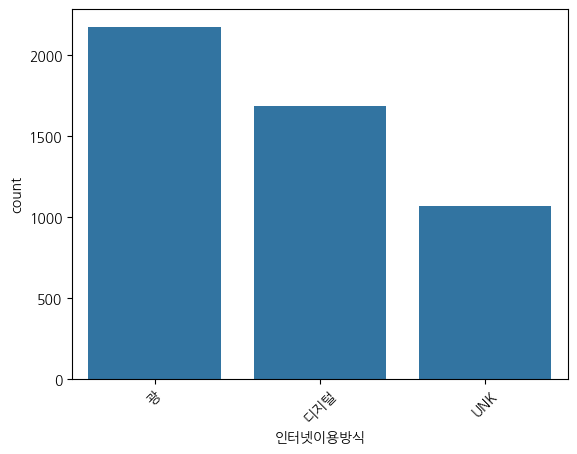

In [25]:
sns.countplot(data=df, x="인터넷이용방식").tick_params(axis='x', rotation=45)
plt.show()

## Relational plots
- 두 개 이상의 변수 간의 관계를 시각적으로 표현하는 데 특화된 그래프들을 제공
- 데이터 탐색 및 분석 과정에서 변수들 간의 상관관계, 패턴, 트렌드 등을 파악하는 데 매우 유용하게 활용

### lineplot
- 시간에 따른 변화나 순서가 있는 데이터의 변화를 선으로 연결하여 표현
- seaborn 의 라인 플롯은 기본적으로 각 x값에 대응되는 여러 y값들의 중심에 대한 추정치로 표현

In [26]:
# df["가입기간"].rolling(5).mean()

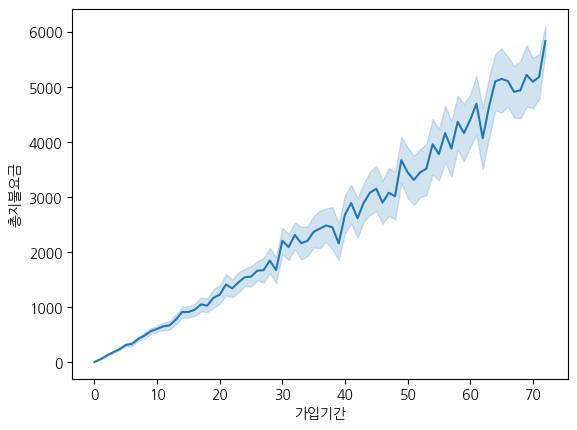

In [27]:
sns.lineplot(data=df, x="가입기간", y="총지불요금") # estimator="mean"
plt.show()

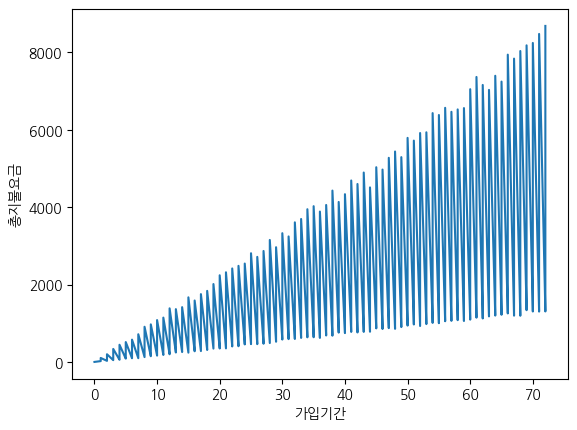

In [28]:
sns.lineplot(data=df, x="가입기간", y="총지불요금", estimator=None)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


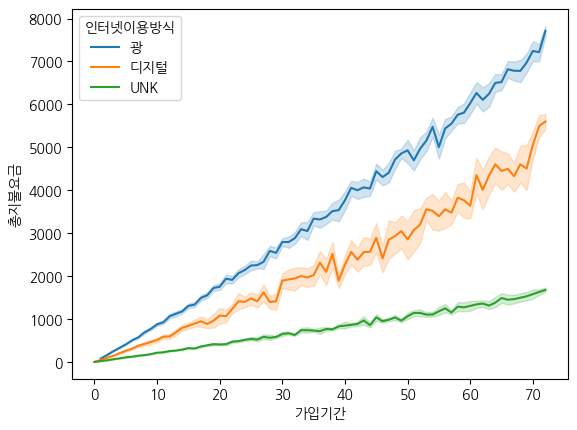

In [29]:
sns.lineplot(data=df, x="가입기간", y="총지불요금", hue="인터넷이용방식")
plt.show()

### scatterplot
- 가장 기본적인 산점도로, 두 수치형 변수 간의 관계를 점으로 표현

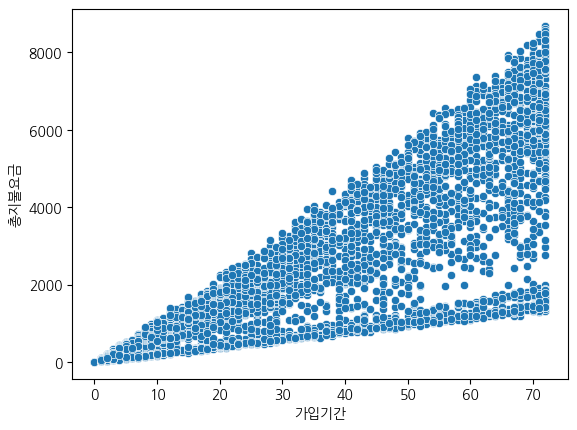

In [30]:
sns.scatterplot(df, x="가입기간", y="총지불요금")
plt.show()

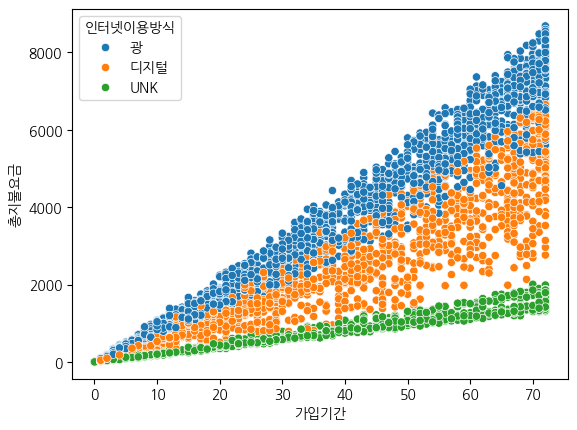

In [31]:
sns.scatterplot(df, x="가입기간", y="총지불요금", hue="인터넷이용방식")
plt.show()

### relplot
- scatterplot과 lineplot을 포함하여 다양한 종류의 관계 플롯을 유연하게 생성

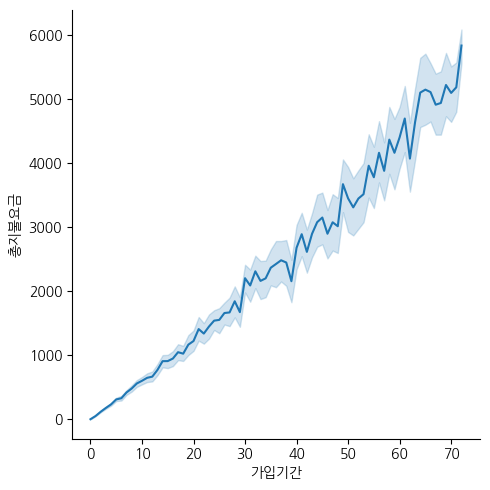

In [32]:
sns.relplot(df, x="가입기간", y="총지불요금", kind="line") # kind="scatter" default
plt.show()

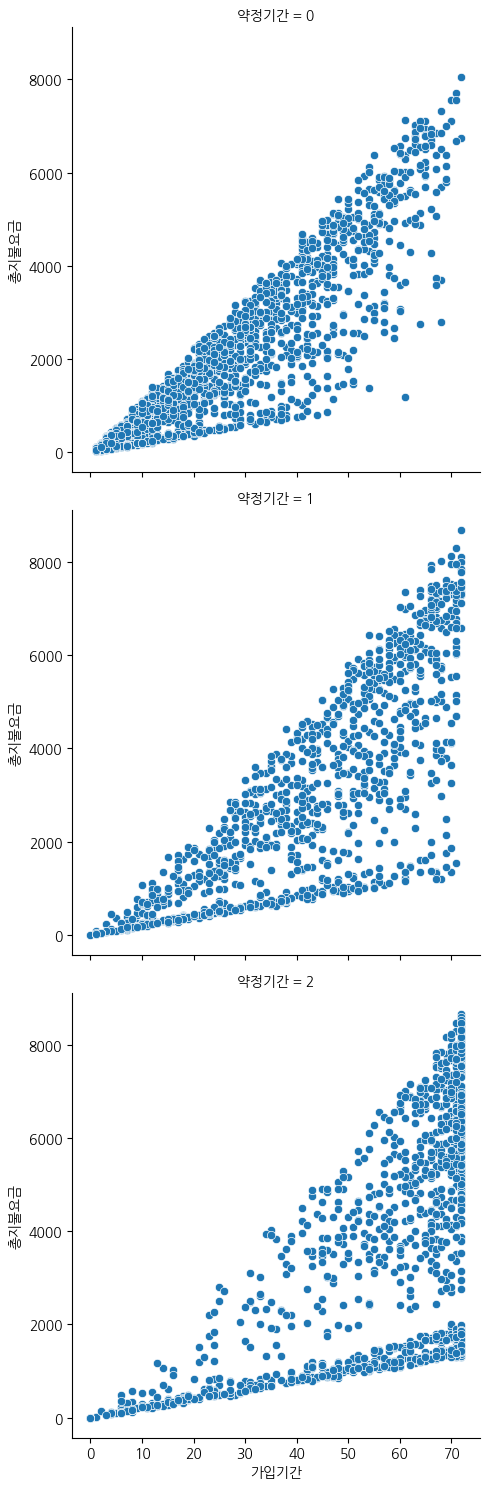

In [33]:
sns.relplot(df, x="가입기간", y="총지불요금", row="약정기간") # col=""
plt.show()

### lmplot
- 추정 회귀선과 산점도를 표현
- 추정 회귀선이란?
> x 에 따른 y 값의 변화를 잘 설명하는 직선


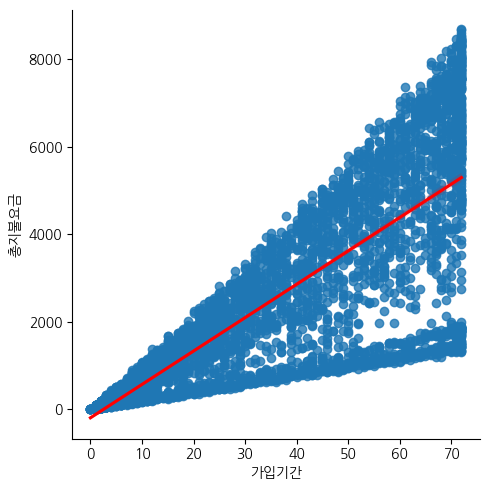

In [34]:
sns.lmplot(df, x="가입기간", y="총지불요금", line_kws={"color":"red"})
plt.show()

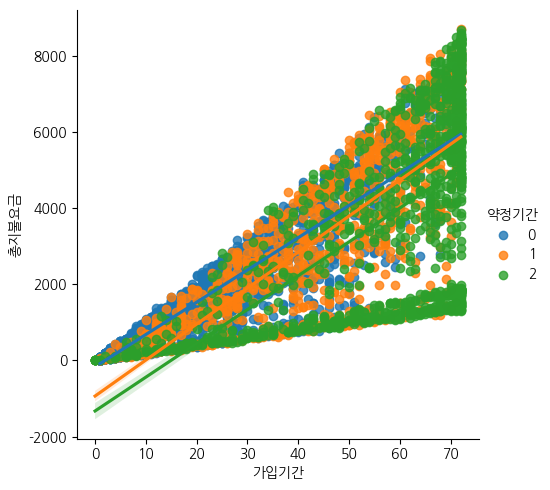

In [35]:
sns.lmplot(df, x="가입기간", y="총지불요금", hue="약정기간")
plt.show()

### heatmap
- 데이터 값의 크기를 색상으로 표현하여 2차원 공간에서 데이터의 분포를 시각화하는 방법

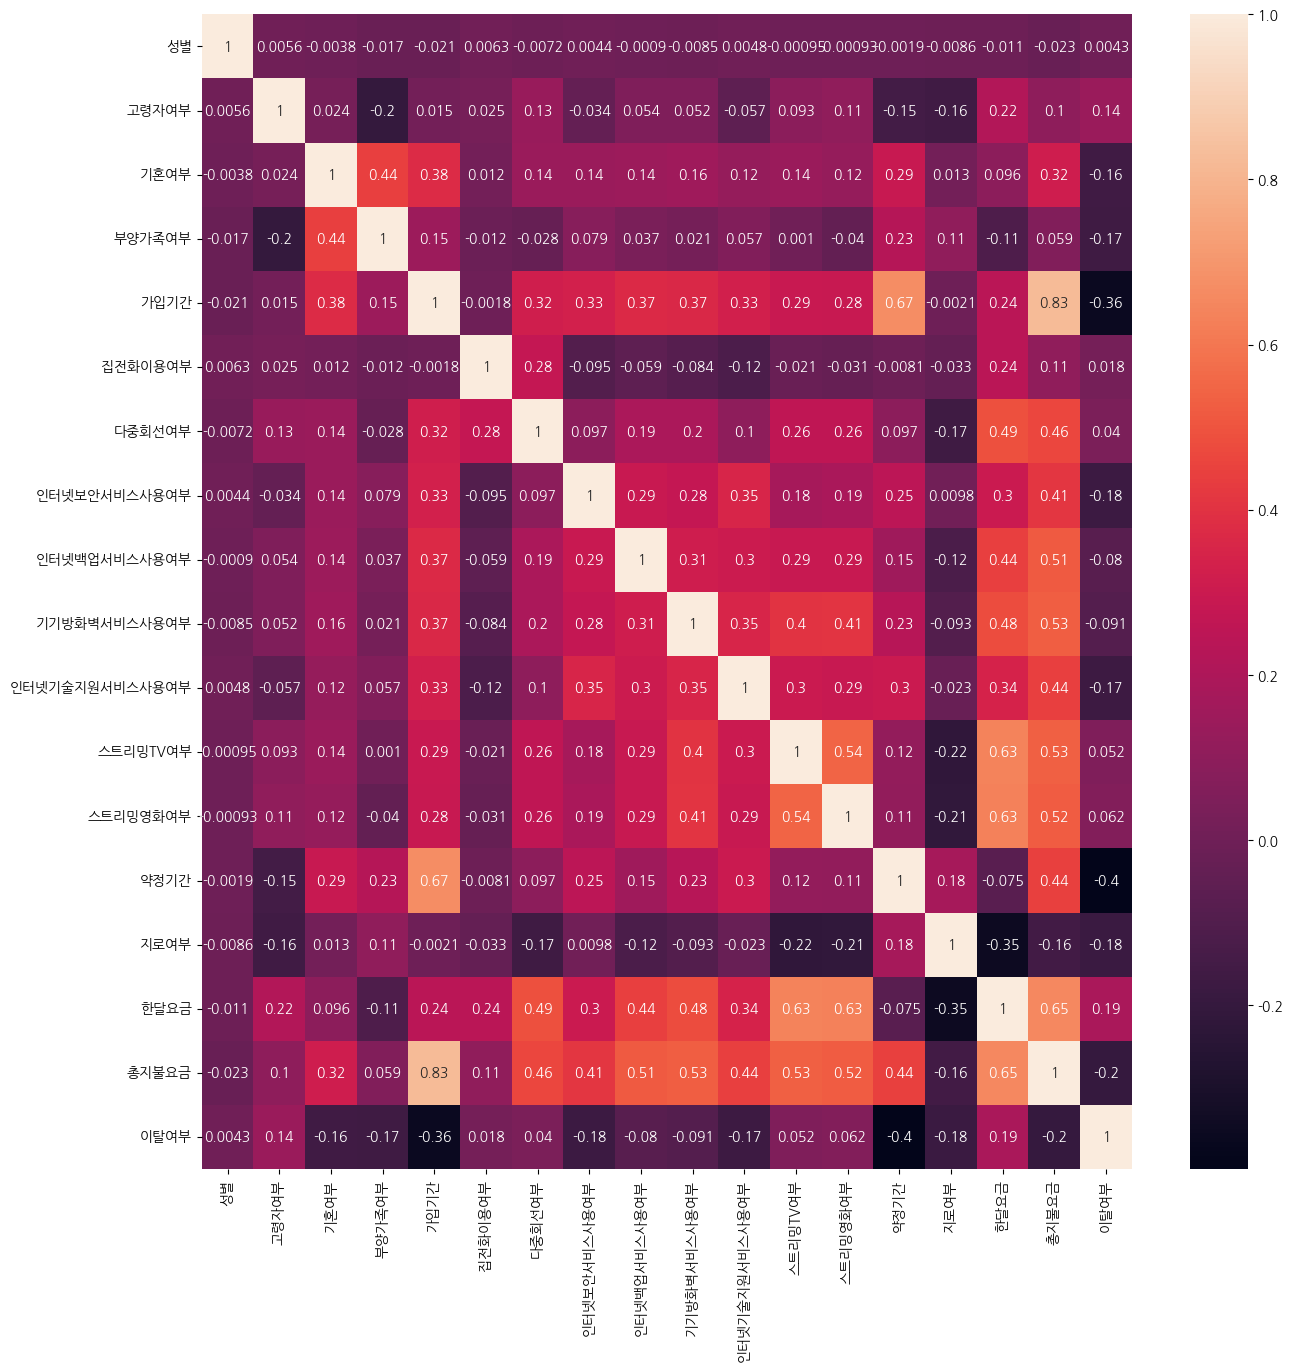

In [63]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, ax=ax)
plt.show()

### pairplot
- 대각선 방향으로는 히스토그램을 나타낸다
- 서로 다른 변수 간에는 산점도를 그린다.

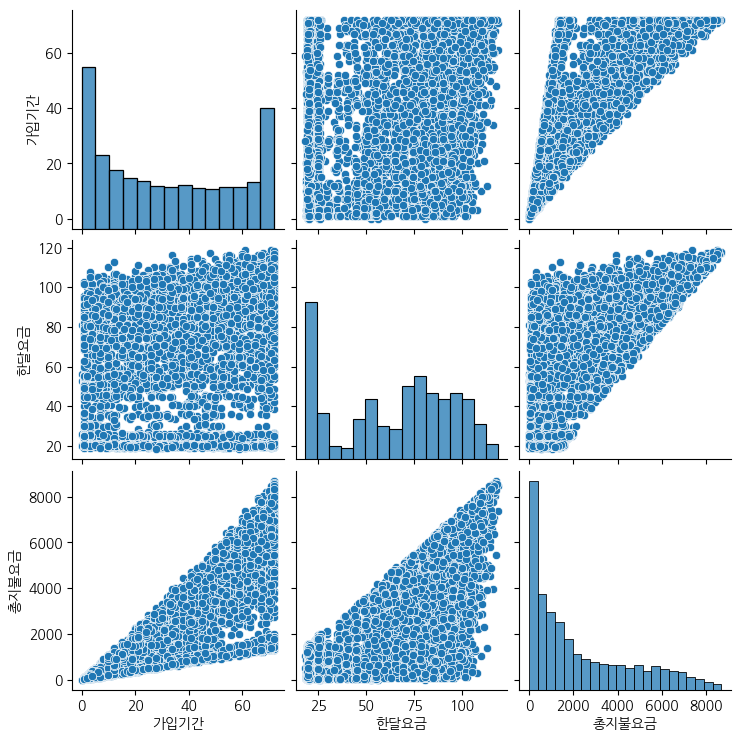

In [46]:
cols = ["가입기간", "한달요금", "총지불요금"]
sns.pairplot(df[cols])
plt.show()

- 커널밀도추정선(Kernel Density Estimation, KDE)
    - 데이터의 분포를 시각적으로 나타내기 위한 방법
    - 매끄럽고 연속적인 곡선으로 표현

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

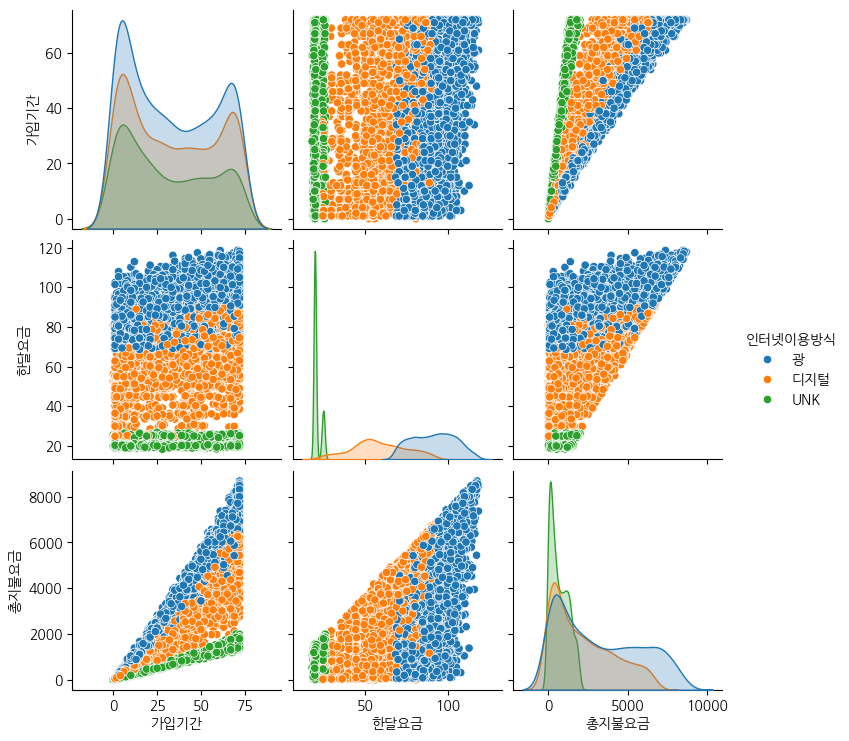

In [47]:
cols = cols + ["인터넷이용방식"]
sns.pairplot(df[cols], hue="인터넷이용방식")
plt.show()

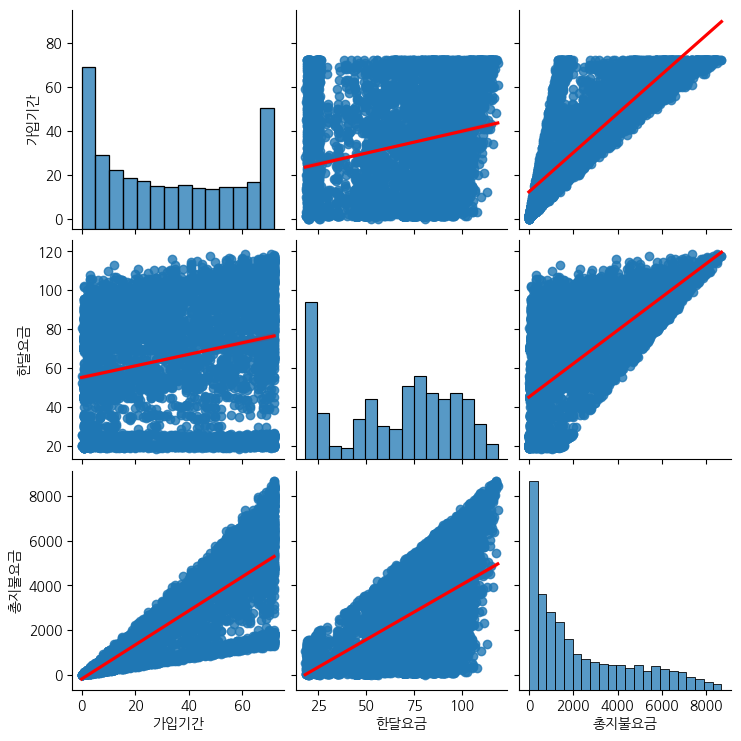

In [49]:
sns.pairplot(df[cols], kind="reg", plot_kws={"line_kws":{"color":"red"}}) # 회귀선 표시
plt.show()

## Distribution plots
- 데이터의 분포를 시각적으로 파악
- Seaborn은 다양한 종류의 분포 플롯을 제공하여 데이터의 중심 경향, 분산, 왜도 등을 쉽게 파악할 수 있게 해준다.

### displot
- histplot과 kdeplot을 함께 사용하여 데이터의 분포를 종합적으로 보여준다.

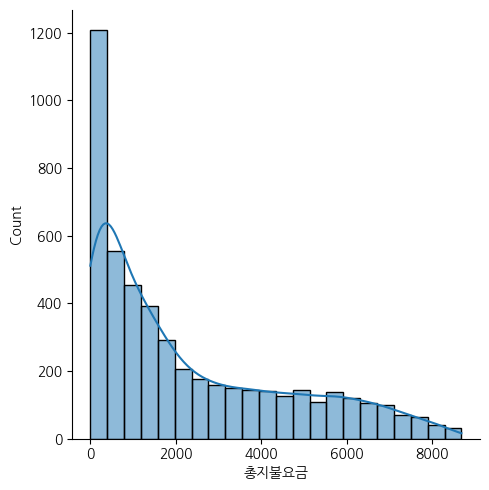

In [53]:
sns.displot(df["총지불요금"], kde=True)
plt.show()

### kdeplot
- 커널 밀도 추정을 통해 부드러운 곡선으로 데이터의 분포를 보여준다.

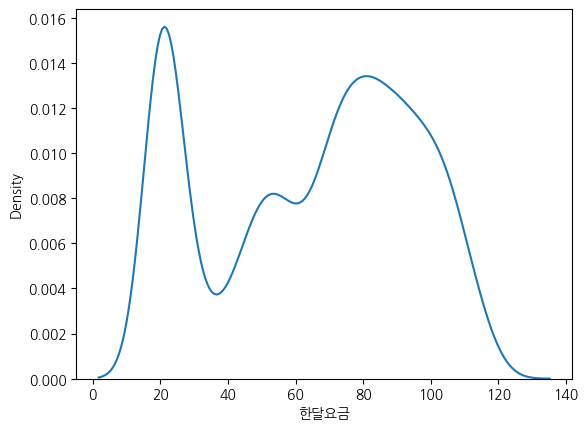

In [82]:
sns.kdeplot(df["한달요금"])
plt.show()

- 등고선 그래프

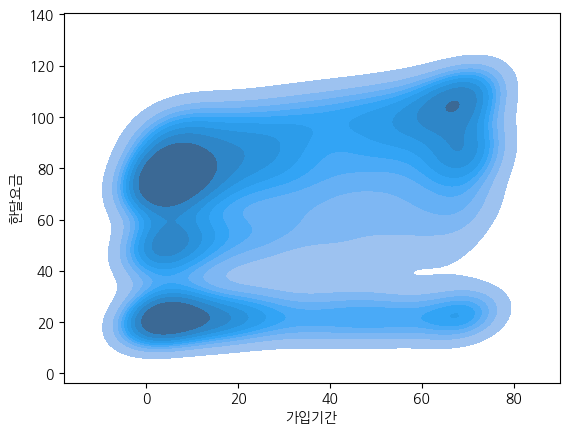

In [85]:
sns.kdeplot(df, x="가입기간", y="한달요금", fill=True)
plt.show()

## Categorical plots
- 범주형 데이터를 시각화하는 데 특화된 그래프들


### countplot
- 각 범주에 속하는 데이터의 개수를 막대 그래프로 보여준다.

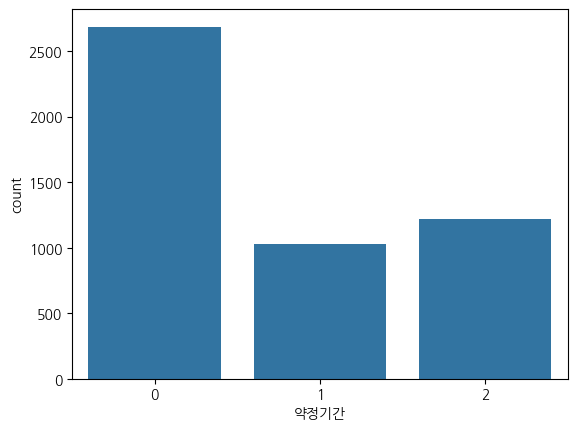

In [86]:
# 약정기간별 회원수
sns.countplot(df, x="약정기간")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


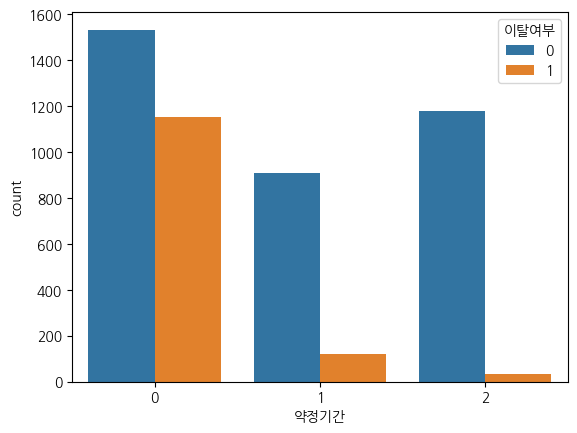

In [87]:
# 각 약정기간에 대한 이탈여부 별 회원수
sns.countplot(df, x="약정기간", hue="이탈여부")
plt.show()

### barplot
- 범주형 데이터의 평균, 합계 등을 막대 그래프 형태로 나타내어 범주 간의 차이를 비교


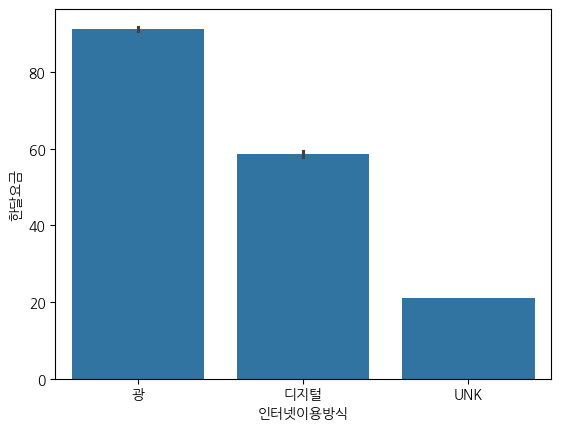

In [88]:
# 인터넷이용방식별로 한달요금의 평균을 막대그래프로 표현
sns.barplot(df, x="인터넷이용방식", y="한달요금") # estimator="mean" default
plt.show()

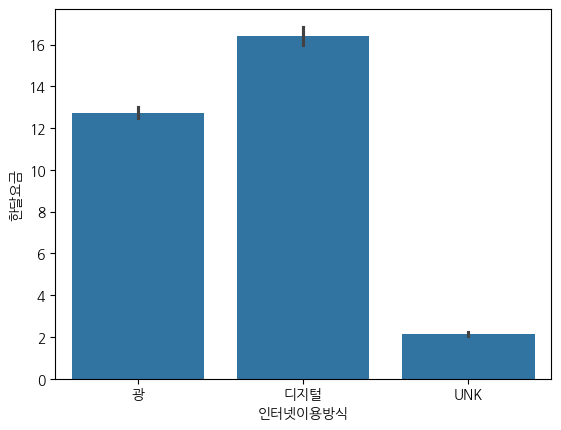

In [54]:
# 인터넷이용방식별로 한달요금의 표준편차를 막대그래프로 표현
sns.barplot(df, x="인터넷이용방식", y="한달요금", estimator="std") # estimator="mean" default, 콜백함수 전달가능
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


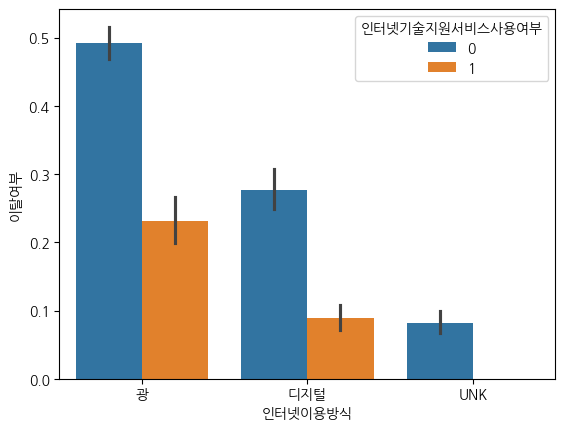

In [57]:
# 각 인터넷이용방식에 대한 인터넷기술지원서비스사용여부별 이탈비율
sns.barplot(df, x="인터넷이용방식", y="이탈여부", hue="인터넷기술지원서비스사용여부")
plt.show()

### boxplot
- 데이터의 중앙값, 사분위수, 최솟값, 최댓값 등을 한눈에 파악하여 각 범주의 데이터 분포를 비교하는 데 유용

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


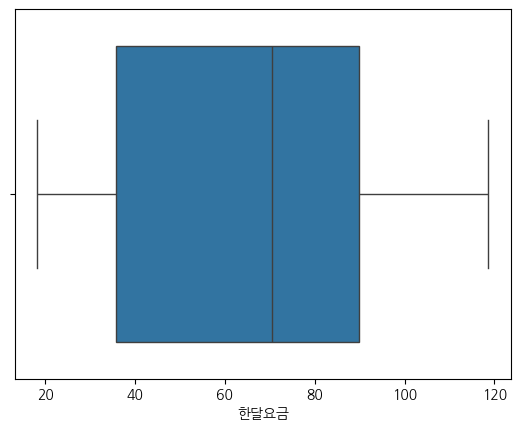

In [102]:
sns.boxplot(df, x="한달요금")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


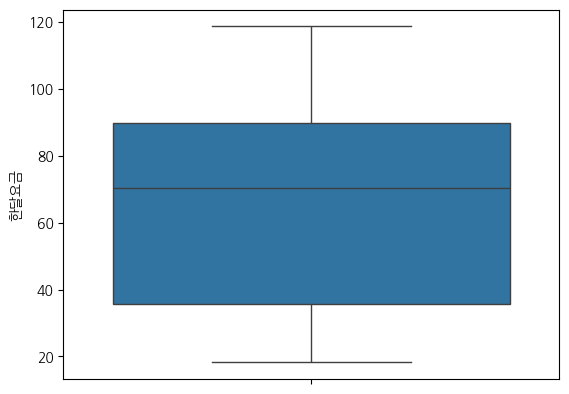

In [103]:
sns.boxplot(df, y="한달요금")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


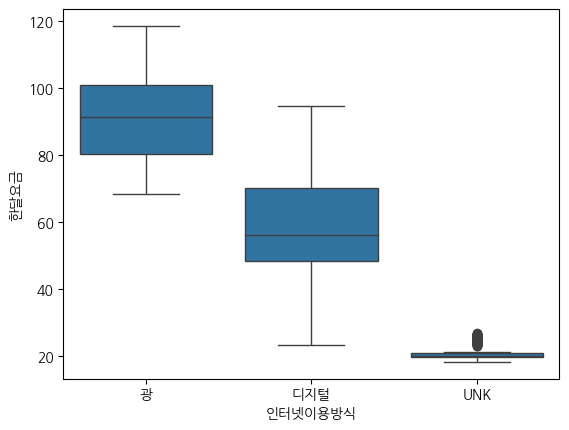

In [104]:
# 인터넷이용방식별 한달요금의 boxplot
sns.boxplot(df, x="인터넷이용방식", y="한달요금")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

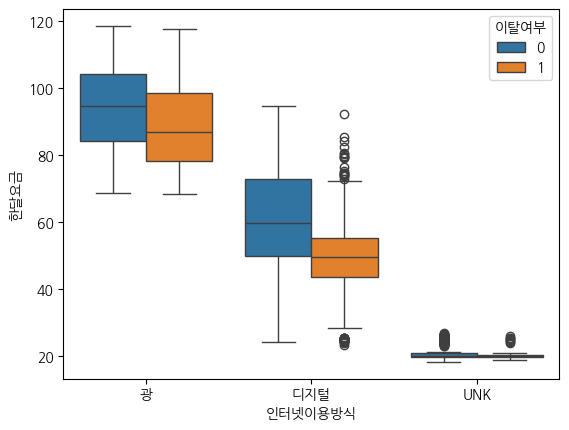

In [105]:
# 각 인터넷이용방식에 대한 이탈여부별 한달요금 boxplot
sns.boxplot(df, x="인터넷이용방식", y="한달요금", hue="이탈여부")
plt.show()

### violinplot
- 박스플롯과 커널 밀도 추정을 결합하여 데이터의 분포를 더욱 상세하게 보여준다.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


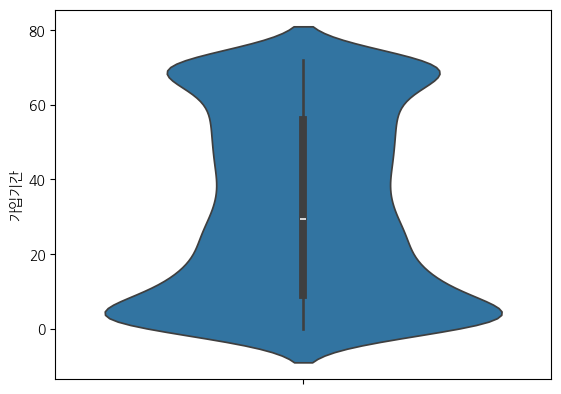

In [112]:
sns.violinplot(df, y="가입기간")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

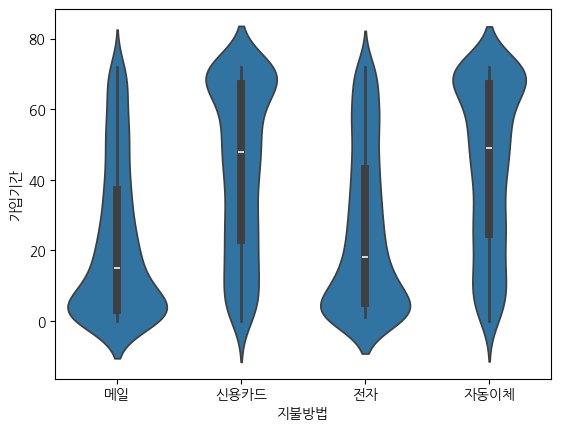

In [114]:
# 지불방법별 가입기간에 대한 바이올린 플롯
sns.violinplot(df, x="지불방법", y="가입기간")
plt.show()

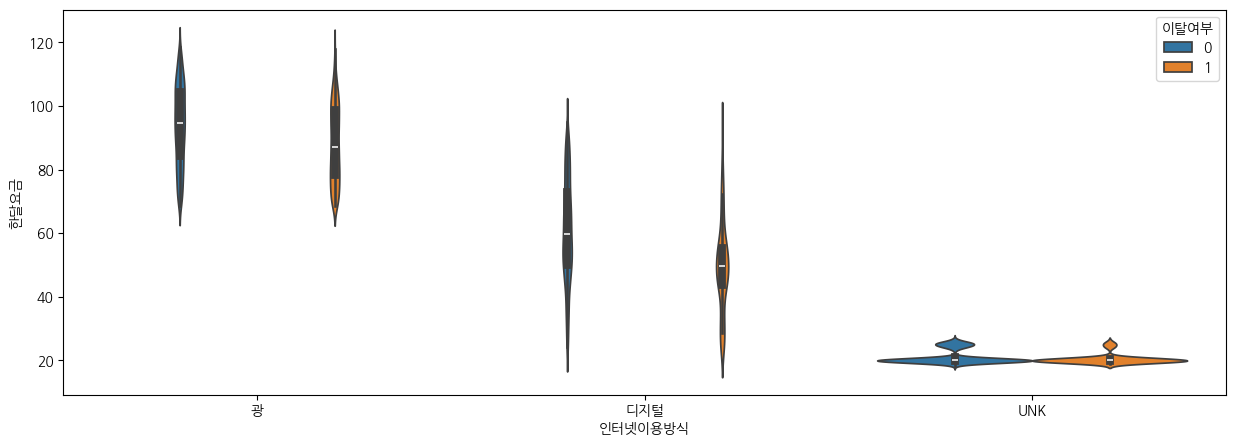

In [119]:
# 각 인터넷이용방식에 대한 이탈여부별 한달요금에 대한 바이올린 플롯
fig, ax = plt.subplots(figsize=[15,5])
sns.violinplot(df, x="인터넷이용방식", hue="이탈여부", y="한달요금") # ax=ax
plt.show()

## 여러개 axes 그리기

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

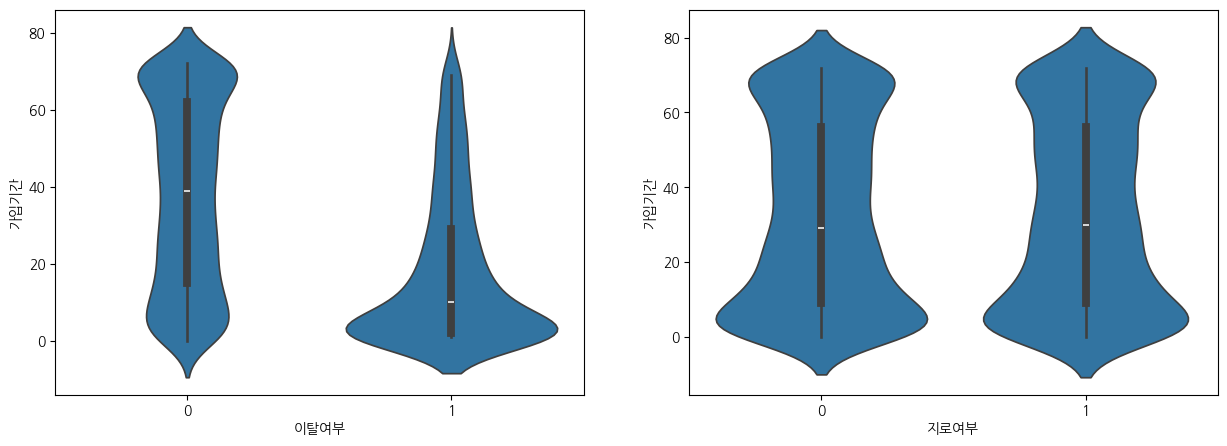

In [59]:
fig, ax = plt.subplots(1,2,figsize=[15,5])

sns.violinplot(df, x="이탈여부", y="가입기간", ax=ax[0])
sns.violinplot(df, x="지로여부", y="가입기간", ax=ax[1])

plt.show()